# CitiBike Big Data Analysis

##  Web scripting failed : not allowed to scripting from Amzon Cloud
import requests
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup
from urllib.request import urlopen
import re

#### Web scraping the tables from the url
html_page = urlopen('https://s3.amazonaws.com/tripdata/index.html')
soup = BeautifulSoup(html_page)

#### Get links of the table
link =  soup.findAll('a', attrs={'href': re.compile("^https://")})
link

#### File not found by the links
import requests, zipfile, io
r = requests.get('https://s3.amazonaws.com/tripdata/201307-201903-citibike-tripdata.zip')
zf = zipfile.ZipFile(io.BytesIO(r.content))
zf.extractall()

## Solution: download zip files to my local drive

In [2]:
#package
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# The Data

In [77]:
import os
import zipfile

# read zip files from my raw_data folder
file_list = os.listdir(path='.')

# creat a list to store all zip file names in raw_data folder
flist = []
for z in file_list: 
    # select zip files to the list
    if z[-4:]=='.zip':
        flist.append(z)
        
#creat a data frame to store all raw data
df = pd.DataFrame()
for f in flist:
    # read data from zip file withou extract a temp file 
    zf = zipfile.ZipFile(f, 'r')      
    raw = pd.read_csv(zf.open(f[:-4]))
    df = df.append(raw)
    #print(df.shape)
    zf.close()
    
# check file size   
df2018.shape

(5005085, 15)

## Data Engernerring

#### Add time features - Year, Month, Date from starttime attribute

In [80]:
# Split datatime value
df2018[['startDate','startTime']] = df2018.starttime.str.split(' ',expand= True,)

#Add colunms for weekday Mon - Sun
new = pd.to_datetime(df2018['startDate'], format="%Y-%m-%d")
df2018['weekDay'] = new.dt.day_name()
#df2018['weekDay'].head()

#Add colunms for date, month and year
new = df2018['startDate'].apply(str).str.split('-',expand= True,)
df2018[['startYear','startMon','startDay']] = new

#Add colunms for  hour, minoue and second
new = df2018['startTime'].apply(str).str.split(':',expand= True,)
df2018[['startHour','startMin','startSecond']] = new

df2018.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,gender,startDate,startTime,weekDay,startYear,startMon,startDay,startHour,startMin,startSecond
0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,...,1,2019-01-01,00:01:47.4010,Tuesday,2019,01,01,00,01,47.4010
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,...,1,2019-01-01,00:04:43.7360,Tuesday,2019,01,01,00,04,43.7360
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,...,1,2019-01-01,00:06:03.9970,Tuesday,2019,01,01,00,06,03.9970
3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,...,1,2019-01-01,00:07:03.5450,Tuesday,2019,01,01,00,07,03.5450
4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,...,1,2019-01-01,00:07:35.9450,Tuesday,2019,01,01,00,07,35.9450


In [19]:
df2018[['startYear']].startYear.unique()   #check colunm values

array(['2018'], dtype=object)

In [81]:
raw = df2018 #backup raw data

In [82]:
raw.shape

(5005085, 24)

In [83]:
raw.to_csv(r'raw_2018_25.csv',index = None, header=True)

# Data Mining

seasonal data 

In [3]:
df = pd.read_csv('raw_2018_25.csv')
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'startDate', 'startTime', 'weekDay',
       'startYear', 'startMon', 'startDay', 'startHour', 'startMin',
       'startSecond', 'trip'],
      dtype='object')

In [4]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,startDate,startTime,weekDay,startYear,startMon,startDay,startHour,startMin,startSecond,trip
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,W 52 St & 11 Ave,40.767272,-73.993929,505.0,6 Ave & W 33 St,40.749013,...,2018-01-01,13:50:57.4340,Monday,2018,1,1,13,50,57.434,From W 52 St & 11 Ave to 6 Ave & W 33 St
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3255.0,8 Ave & W 31 St,40.750585,...,2018-01-01,15:33:30.1820,Monday,2018,1,1,15,33,30.182,From W 52 St & 11 Ave to 8 Ave & W 31 St
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,W 52 St & 11 Ave,40.767272,-73.993929,525.0,W 34 St & 11 Ave,40.755942,...,2018-01-01,15:39:18.3370,Monday,2018,1,1,15,39,18.337,From W 52 St & 11 Ave to W 34 St & 11 Ave
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,W 52 St & 11 Ave,40.767272,-73.993929,447.0,8 Ave & W 52 St,40.763707,...,2018-01-01,15:40:13.3720,Monday,2018,1,1,15,40,13.372,From W 52 St & 11 Ave to 8 Ave & W 52 St
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3356.0,Amsterdam Ave & W 66 St,40.774667,...,2018-01-01,18:14:51.5680,Monday,2018,1,1,18,14,51.568,From W 52 St & 11 Ave to Amsterdam Ave & W 66 St


In [5]:
daily_count = df[['startDate','tripduration']].groupby(['startDate']).count()
daily_count.columns = ['dailyCount']
daily_count.head()

,dailyCount
startDate,
2018-01-01,5500
2018-01-02,18818
2018-01-03,24299
2018-01-04,1922
2018-01-05,4972


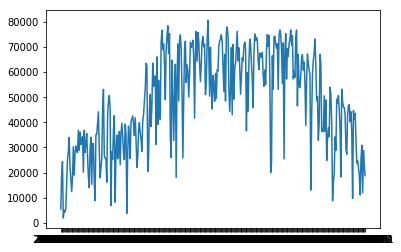

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# use the plot function
plt.plot(daily_count)

In [6]:
month_count = df[['startMon','tripduration']].groupby(['startMon']).count()
month_count.columns = ['monthlyCount']
#month_count.head()

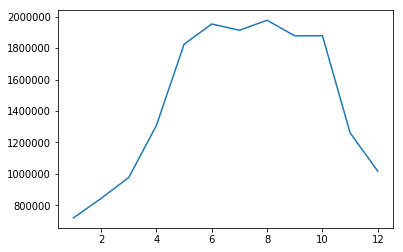

In [13]:
# use the plot function
plt.plot(month_count2018)

In [8]:
daily_count = daily_count.reset_index('startDate')
new = pd.to_datetime(daily_count['startDate'], format="%Y-%m-%d")
daily_count['weekDay'] = new.dt.day_name()
daily_count.head()

,startDate,dailyCount,weekDay
0,2018-01-01,5500,Monday
1,2018-01-02,18818,Tuesday
2,2018-01-03,24299,Wednesday
3,2018-01-04,1922,Thursday
4,2018-01-05,4972,Friday


In [16]:
week_avg_count = daily_count[['weekDay','dailyCount']].groupby(['weekDay']).mean()
week_avg_count = week_avg_count.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
week_avg_count = week_avg_count.reset_index('weekDay')

In [17]:
week_avg_count2018.head()

,weekDay,dailyCount
0,Monday,47837.075472
1,Tuesday,51909.980769
2,Wednesday,52648.000000
3,Thursday,52658.692308
4,Friday,50046.365385


In [13]:
import matplotlib.pyplot as plt

# Plot
plt.pie(new.tripduration, explode=(0.1, 0, 0), labels=(new.gender), colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

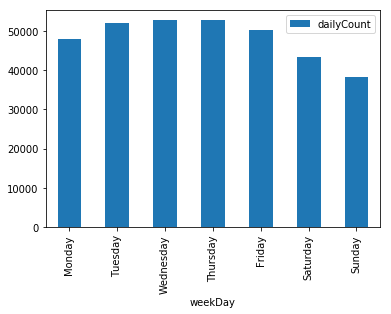

In [18]:
ax = week_avg_count2018.plot.bar( x='weekDay', y='dailyCount')

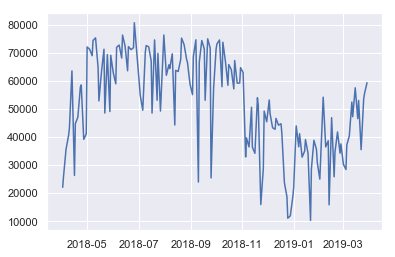

In [32]:
weekday = df.loc[df['weekDay'].isin(['Monday','Tuesday','Wenesday', 'Thuresday','Friday'])]
weekend = df.loc[df['weekDay'].isin(['Saturday','Sunday'])]

daily_weekday = weekday[['startDate','tripduration']].groupby(['startDate']).count()
daily_weekday.columns = ['weekday_day_Count']

daily_weekend = weekend[['startDate','tripduration']].groupby(['startDate']).count()
daily_weekend.columns = ['weekend_day_Count']

# multiple line plot
plt.plot( 'x', 'y1', data=daily_weekday, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend()



In [ ]:
# use the plot function
plt.plot(daily_weekend)

In [ ]:
daily_count = df[['startDate','tripduration']].groupby(['startDate']).count()
daily_count.columns = ['dailyCount']
daily_count.head()


In [19]:
# Hourly data 
hourly_count = df[['startHour','tripduration']].groupby(['startHour']).count()
hourly_count.columns = ['hourlyCount']
hourly_count = hourly_count.reset_index('startHour')
hourly_count.head()

,startHour,hourlyCount
0,0,153529
1,1,85853
2,2,50145
3,3,31128
4,4,32763


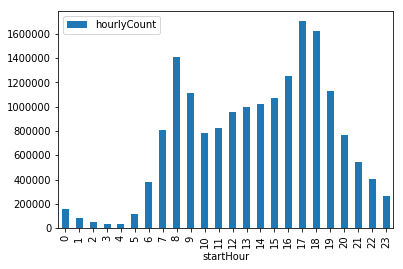

In [20]:
ax = hourly_count.plot.bar( x='startHour', y='hourlyCount')

### The most popular trips

In [28]:
# Where are most popular trips based on start station and stop station?
df['trip'] = "From " + df["start station name"] + " to " + df["end station name"]
df['trip'].value_counts().head()

From Central Park S & 6 Ave to Central Park S & 6 Ave                          7852
From E 7 St & Avenue A to Cooper Square & Astor Pl                             7249
From Grand Army Plaza & Central Park S to Grand Army Plaza & Central Park S    6344
From Central Park S & 6 Ave to 5 Ave & E 88 St                                 6215
From S 4 St & Wythe Ave to N 6 St & Bedford Ave                                5456
Name: trip, dtype: int64

In [27]:
#the most popular of Circle trips destinations
df_circl["end station name"].value_counts().head()

Central Park S & 6 Ave               7852
Grand Army Plaza & Central Park S    6344
Centre St & Chambers St              4464
West Drive & Prospect Park West      3843
Yankee Ferry Terminal                3191
Name: end station name, dtype: int64

In [24]:
#1. Circle trips
df_circl = df[(df["start station name"] == df["end station name"])]
df_circl.shape[0]

347100

In [25]:
# % of Circle trips per month
df_circl.shape[0]/df.shape[0] *100

1.9779649800473993

### Tripduration: 30-min, 45-min and more45-min

In [22]:
min_trip[min_trip.tripduration <= 30].count() 

tripduration    16176685
dtype: int64

In [21]:
# tripduration
min_trip = df[['tripduration']]/60
#min_trip.describe()

In [23]:
min_trip[(min_trip.tripduration > 30) & (min_trip.tripduration <= 45)].count()

tripduration    1039409
dtype: int64

#### Subscriber vs Customer

In [9]:
subscriber_dailycount2018 = df.loc[df['usertype'] == 'Subscriber'][['startDate','tripduration']].groupby(['startDate']).count()

In [17]:
sub_du = df.loc[df['usertype'] == 'Subscriber'][['tripduration']]
sub_du[sub_du.tripduration <= 900].count() # 15mins


tripduration    11434025
dtype: int64

In [18]:
sub_du[(sub_du.tripduration > 900) & (sub_du.tripduration <= 1800) ].count() # in 15-30 mins

tripduration    3257295
dtype: int64

In [19]:
sub_du[(sub_du.tripduration > 1800) & (sub_du.tripduration <= 2700) ].count() # in 30-45 mins

tripduration    788343
dtype: int64

In [20]:
sub_du[(sub_du.tripduration > 2700) & (sub_du.tripduration <= 3600) ].count() # in 45-60 mins

tripduration    89264
dtype: int64

In [26]:
sub_du[sub_du.tripduration > 3600 ].count() # above 60 mins

tripduration    45898
dtype: int64

In [27]:
sub_du.mean()

tripduration    791.879741
dtype: float64

In [10]:
customer_dailycount2018 = df.loc[df['usertype'] == 'Customer'][['startDate','tripduration']].groupby(['startDate']).count()

In [23]:
cos_du = df.loc[df['usertype'] == 'Customer'][['tripduration']]
cos_du[cos_du.tripduration <= 900].count() # 15mins

tripduration    570602
dtype: int64

In [24]:
cos_du[(cos_du.tripduration > 900) & (cos_du.tripduration <= 1800) ].count() # in 15-30 mins

tripduration    914763
dtype: int64

In [25]:
cos_du[(cos_du.tripduration > 1800) & (cos_du.tripduration <= 2700) ].count() # in 30-45 mins

tripduration    251066
dtype: int64

In [28]:
cos_du[(cos_du.tripduration > 2700) & (cos_du.tripduration <= 3600) ].count() # in 45-60 mins

tripduration    76668
dtype: int64

In [29]:
cos_du[cos_du.tripduration > 3600 ].count() # above 60 mins

tripduration    120415
dtype: int64

In [30]:
cos_du.mean()

tripduration    2578.588645
dtype: float64

In [11]:
subscriber_dailycount2018.to_csv(r'subscriber_dailycount2018.csv',index = None, header=True)
customer_dailycount2018.to_csv(r'customer_dailycount2018.csv',index = None, header=True)

#### Citi Bike Long Duration Trips

In [36]:
du45minsMore = df.loc[df['tripduration'] > 2700]
du45minsMore.to_csv(r'du45minsMore.csv',index = None, header=True)                

In [37]:
du45minsMore.shape

(332245, 25)

In [15]:
new = min45more[['tripduration','usertype']].groupby(['usertype']).count()
new = new.reset_index('usertype')
new

,usertype,tripduration
0,Customer,197083
1,Subscriber,135162


#### Male vs Female

In [ ]:
Female_dailycount2018 = df.loc[df['gender'] == 2][['startDate','tripduration']].groupby(['startDate']).count()

In [29]:
#How riders performance by gender and age based on average trip distance (station to station), median speed (trip duration / distance traveled)? 

# Gender (Zero=unknown; 1=male; 2=female)

from statistics import median
df_gender = df[['trip','tripduration','gender',]]
df_gender = df_gender.loc[df_gender['gender'].isin(['1','2'])] # filer out unknown value in gender
df_gender_mean = df_gender.groupby(['trip','gender'])['tripduration'].mean()
df_gender_mean = df_gender_mean.to_frame().reset_index() # conver series to dataframe
df_gender_mean = df_gender_mean.pivot(index='trip', columns='gender', values='tripduration').dropna() # long to wide form and drop NaN rows
df_gender_mean.head()

#df_gender_mean['dif_duration'] = df_gender_mean['2'] - df_gender_mean['1']



gender,1,2
trip,,
From 1 Ave & E 110 St to 1 Ave & E 110 St,1309.190476,1226.950000
From 1 Ave & E 110 St to 1 Ave & E 16 St,2109.000000,2165.285714
From 1 Ave & E 110 St to 1 Ave & E 62 St,1625.863636,2201.600000
From 1 Ave & E 110 St to 1 Ave & E 68 St,1465.807692,1846.500000
From 1 Ave & E 110 St to 1 Ave & E 78 St,805.046512,1024.941176


In [39]:
df_gender_mean.to_csv(r'df_gender_mean.csv',index = None, header=True)


### Age 

In [46]:
df_age = df[['trip','tripduration','gender','birth year']]
df_age[['Age']] = 2018-df_age[['birth year']]
df_age.head()

C:\Users\Ada\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,trip,tripduration,gender,birth year,Age
0,From W 52 St & 11 Ave to 6 Ave & W 33 St,970,1,1992,26
1,From W 52 St & 11 Ave to 8 Ave & W 31 St,723,1,1969,49
2,From W 52 St & 11 Ave to W 34 St & 11 Ave,496,1,1956,62
3,From W 52 St & 11 Ave to 8 Ave & W 52 St,306,1,1974,44
4,From W 52 St & 11 Ave to Amsterdam Ave & W 66 St,306,1,1992,26


In [48]:
df_age[['Age']].min()

Age    16
dtype: int64

In [62]:
df_age[['Age']].max()

Age    133
dtype: int64

In [61]:
df_age.loc[df_age['Age'] > 90].count()

trip            13452
tripduration    13452
gender          13452
birth year      13452
Age             13452
dtype: int64

In [40]:
# Age 'birth year' 

df_age = df[['trip','tripduration','gender','birth year']]
#df_age = df_age.loc[df_age['gender'].isin(['1','2'])] # filer out unknown value in gender

df_age[['Age']] = 2018-df_age[['birth year']]
df_age.describe()

#df_age.isnull().sum()


#filtered_df_age = df_age[df_age[['trip']].notnull()]
#filtered_df_age.isnull().sum()


trip                2224
tripduration    16063784
gender          16063784
birth year      16063784
Age             16063784
dtype: int64

In [60]:
df_age.dropna()
df_age.describe()

,tripduration,gender,birth year,Age
count,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07
mean,9.887432e+02,1.148613e+00,1.978993e+03,3.900750e+01
std,1.889584e+04,5.438043e-01,1.192922e+01,1.192922e+01
min,6.100000e+01,0.000000e+00,1.885000e+03,1.600000e+01
25%,3.580000e+02,1.000000e+00,1.969000e+03,2.900000e+01
50%,6.050000e+02,1.000000e+00,1.981000e+03,3.700000e+01
75%,1.060000e+03,1.000000e+00,1.989000e+03,4.900000e+01
max,1.951005e+07,2.000000e+00,2.002000e+03,1.330000e+02


In [68]:
df_age[(df_age["Age"] <25)].groupby(['trip'])['tripduration'].mean()



trip
From 1 Ave & E 110 St to 1 Ave & E 110 St                                 2901.500000
From 1 Ave & E 110 St to 1 Ave & E 62 St                                  1592.000000
From 1 Ave & E 110 St to 1 Ave & E 68 St                                  1893.000000
From 1 Ave & E 110 St to 1 Ave & E 78 St                                  1152.000000
From 1 Ave & E 110 St to 1 Ave & E 94 St                                   503.714286
From 1 Ave & E 110 St to 2 Ave & E 104 St                                  423.142857
From 1 Ave & E 110 St to 2 Ave & E 31 St                                  2332.500000
From 1 Ave & E 110 St to 2 Ave & E 96 St                                   434.928571
From 1 Ave & E 110 St to 2 Ave & E 99 St                                   358.111111
From 1 Ave & E 110 St to 3 Ave & E 100 St                                  708.666667
From 1 Ave & E 110 St to 3 Ave & E 112 St                                 1151.600000
From 1 Ave & E 110 St to 3 Ave & E 95 St         

In [69]:
df_age[(df_age["Age"] <50) & (df_age["Age"] >25)].groupby(['trip'])['tripduration'].mean()

trip
From 1 Ave & E 110 St to 1 Ave & E 110 St                         1783.163180
From 1 Ave & E 110 St to 1 Ave & E 16 St                          2165.285714
From 1 Ave & E 110 St to 1 Ave & E 18 St                          2315.000000
From 1 Ave & E 110 St to 1 Ave & E 30 St                          1763.000000
From 1 Ave & E 110 St to 1 Ave & E 44 St                          1615.000000
From 1 Ave & E 110 St to 1 Ave & E 62 St                          1924.166667
From 1 Ave & E 110 St to 1 Ave & E 68 St                          1455.076923
From 1 Ave & E 110 St to 1 Ave & E 78 St                          2819.940000
From 1 Ave & E 110 St to 1 Ave & E 94 St                           549.471698
From 1 Ave & E 110 St to 11 Ave & W 41 St                         2280.000000
From 1 Ave & E 110 St to 12 Ave & W 40 St                         2920.000000
From 1 Ave & E 110 St to 19 St & 24 Ave                           1719.000000
From 1 Ave & E 110 St to 2 Ave & E 104 St                  

In [ ]:
df_age[(df_age["Age"] <50) & (df_age["Age"] >25)].groupby(['trip'])['tripduration'].mean()

# Weather Effect by Daily Count

### Attributes description in Wearther data table 
###### NAME - Station name
###### TMAX - Represents highest hourly temperature
TMIN - Represents lowest hourly temperature
TOBS - Temperature at the time of observation (Fahrenheit or Celsius as per user preference)
TAVG - Represents Average of TMAX,TMIN and TOBS values temperature
AWND - Average daily wind speed (meters per second or miles per hour as per user preference)
SNWD - Snow depth (mm or inches as per user preference, inches on Daily Form pdf file

https://www.ncdc.noaa.gov/cdo-web/datasets#GHCND

In [38]:
weather = pd.read_csv('weather ny.csv')
weather = weather.loc[weather['NAME'] == 'NY CITY CENTRAL PARK, NY US']
weather['TAVG'] = weather[['TMAX','TMIN','TOBS']].mean(axis = 1)
weather_daily_nyc = weather[['DATE','TAVG','AWND','SNWD']]
weather_daily_nyc = weather_daily_nyc[weather_daily_nyc['DATE'].between('2018-01-01', '2018-12-31',inclusive=True)]
weather_daily_nyc.describe()

,TAVG,AWND,SNWD
count,365.000000,281.000000,365.000000
mean,55.953425,4.536512,0.179726
std,17.724324,2.557555,0.935869
min,9.500000,0.000000,0.000000
25%,41.000000,2.460000,0.000000
50%,54.000000,3.800000,0.000000
75%,73.000000,6.040000,0.000000
max,87.500000,12.970000,7.900000


In [39]:
daily_count = df[['startDate','tripduration']].groupby(['startDate']).count()
daily_count.columns = ['dailyCount']
#daily_count.head()


weather = weather_daily_nyc.set_index('DATE')
#weather.head()

#daily_count_weather = pd.merge([daily_count, weather2],axis=1)
daily_count_weather = daily_count.join(weather)
daily_count_weather.sort_values(by=['TAVG']).head()

,dailyCount,TAVG,AWND,SNWD
startDate,,,,
2018-01-06,4295,9.5,10.96,5.9
2018-01-07,5640,11.5,6.49,5.9
2018-01-01,5500,13.0,7.83,0.0
2018-01-05,4972,14.0,12.97,7.1
2018-01-02,18818,19.5,8.05,0.0


In [11]:
type(daily_count_weather[['dailyCount','TAVG']])

pandas.core.frame.DataFrame

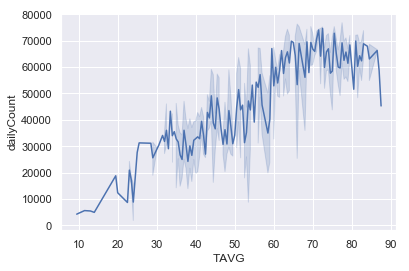

In [40]:
# Temperature effect
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
temp_count = daily_count_weather[['dailyCount','TAVG']]
ax = sns.lineplot(x="TAVG", y="dailyCount", data=temp_count)

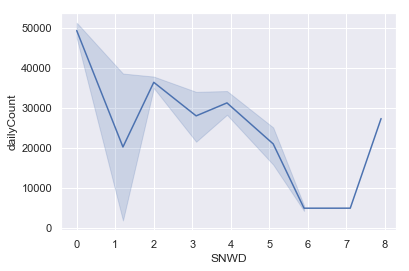

In [41]:
# Snowfall Depth effect
daily_count_weather.sort_values(by=['SNWD']).head()
snow_count = daily_count_weather[['dailyCount','SNWD']]
ax = sns.lineplot(x='SNWD', y="dailyCount", data=snow_count)

In [43]:
busy_bike = df[['bikeid','tripduration']].groupby(['bikeid']).sum()/60
busy_bike.columns = ['tripduration']
busy_bike.sort_values(by=['tripduration']).tail(1)

,tripduration
bikeid,
18504,233348.333333
16533,242442.933333
16777,261118.033333
30875,277144.700000
30503,334853.366667


In [45]:
df[['bikeid','tripduration']].loc[df['bikeid'] == 18504].count()

bikeid          549
tripduration    549
dtype: int64

In [71]:
#!jupyter nbextension enable --py --sys-prefix ipyleaflet

Enabling notebook extension jupyter-leaflet/extension...
      - Validating: ok


In [74]:
#from ipyleaflet import Map
from ipyleaflet import (Map,DrawControl)
myMap = Map(center=[32.7766,-96.7969],zoom=10)
dc=DrawControl(circle = {'shapeOptions':{'color':'#0000FF'}},rectangle = {'shapeOptions':{'color':'#0000FF'}} )
myMap.add_control(dc)
myMap

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [ ]:
# multiple line plot
plt.plot( 'TAVG', 'dailyCount', data=fmri, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'TAVG', 'SNWD', data=fmri, marker='', color='olive', linewidth=2)
plt.legend()


### NYC Daily Weather Report 2013 - 2019 

In [116]:
#weather May 27,2013 - Dec 31,2016
daily_weather_NYC = pd.read_csv("NYC Daily Weather 2013-2016.csv")
daily_weather_NYC = daily_weather_NYC.loc[daily_weather_NYC['NAME'] == 'NY CITY CENTRAL PARK, NY US']
daily_weather_NYC ['TAVG'] = daily_weather_NYC [['TMAX','TMIN']].mean(axis = 1)
daily_weather_NYC = daily_weather_NYC[['DATE','TAVG','AWND','SNWD']]

#weather Jan 01,2017 - Apr 30,2019
daily_weather_NYC2 = pd.read_csv("NYC Daily Weather 2017-2019.csv")
daily_weather_NYC2 = daily_weather_NYC2.loc[daily_weather_NYC2['NAME'] == 'NY CITY CENTRAL PARK, NY US']
daily_weather_NYC2 ['TAVG'] = daily_weather_NYC2 [['TMAX','TMIN']].mean(axis = 1)
daily_weather_NYC2 = daily_weather_NYC2[['DATE','TAVG','AWND','SNWD']]

#weather May 27,2013 - Apr 30,2019
daily_weather_NYC = daily_weather_NYC.append(daily_weather_NYC2)
daily_weather_NYC.head()


In [348]:
daily_weather_NYC.to_csv(r'daily_weather_NYC_201305_201904.csv',index = None, header=True)

### Daily Trip Counts from Quaterly Reports of Citi Bike 


In [216]:
dailyCount_memberType2013_2019 = pd.DataFrame()

In [214]:
q = pd.read_csv('2013q2_3.csv')
q = q.iloc[:, [0,1,3,5,7,8]]
#q.head(1) #check column names   

#combin non-annual members 24hr and 7Days
q['24-Hour Passes Purchased (midnight to 11:59 pm)'] = q['24-Hour Passes Purchased (midnight to 11:59 pm)'] + q['7-Day Passes Purchased (midnight to 11:59 pm)']
q = q.iloc[:,:-1] #remove 7days column
q.columns = ['Date', 'Daily Trips','Miles Today','Total Annual Members', 'Customer'] #rename columns
    
#q.tail(1)
dailyCount_memberType2013_2019 = dailyCount_memberType2013_2019.append(q) 
dailyCount_memberType2013_2019.head(1)

,Date,Daily Trips,Miles Today,Total Annual Members,Customer
126,9/30/2013,41079,67.168,85236,1163


In [218]:
q = pd.read_csv('2013q4.csv')
q = q.iloc[:, [0,1,3,5,7]]
q.columns = ['Date', 'Daily Trips','Miles Today','Total Annual Members', 'Customer'] #rename columns
dailyCount_memberType2013_2019 = dailyCount_memberType2013_2019.append(q) 
dailyCount_memberType2013_2019.tail(1)

,Date,Daily Trips,Miles Today,Total Annual Members,Customer
91,12/31/2013,11349,14.856,96125,237


In [231]:
q_list = ['2014q1.csv','2014q2.csv','2014q3.csv','2014q4.csv']
q_new = pd.DataFrame()
for i in q_list:
    q = pd.read_csv(i)
    q = q.iloc[:, [0,1,3,5,7,8]]
    #combin non-annual members 24hr and 7Days
    q['24-Hour Passes Purchased (midnight to 11:59 pm)'] = q['24-Hour Passes Purchased (midnight to 11:59 pm)'] + q['7-Day Passes Purchased (midnight to 11:59 pm)']
    q = q.iloc[:,:-1] #remove 7days column
    q.columns = ['Date', 'Daily Trips','Miles Today','Total Annual Members', 'Customer'] #rename columns
    q_new = q_new.append(q)

#q_new.head(1)

dailyCount_memberType2013_2019 = dailyCount_memberType2013_2019.append(q_new) 
dailyCount_memberType2013_2019.tail(1)

,Date,Daily Trips,Miles Today,Total Annual Members,Customer
0,1/1/2014,6559,9.254,95971,278


In [314]:
#replace q['7-Day Passes Purchased (midnight to 11:59 pm)']= undifined to 220 = avg of pevious 5 days values in 2025q3.csv
q_list = ['2015q1.csv','2015q2.csv','2015q3.csv','2015q4.csv','2016q1.csv']
q_new = pd.DataFrame()
for i in q_list:
    q = pd.read_csv(i)
    q = q.iloc[:, [0,1,3,5,6,7]]
    #combin non-annual members 24hr and 7Days
    q['24-Hour Passes Purchased (midnight to 11:59 pm)'] = q['24-Hour Passes Purchased (midnight to 11:59 pm)'] + q['7-Day Passes Purchased (midnight to 11:59 pm)']
    q = q.iloc[:,:-1] #remove 7days column
    q.columns = ['Date', 'Daily Trips','Miles Today','Total Annual Members', 'Customer'] #rename columns
    q_new = q_new.append(q)

#q_new.tail(1)
dailyCount_memberType2013_2019 = dailyCount_memberType2013_2019.append(q_new) 
dailyCount_memberType2013_2019.tail(1)


,Date,Daily Trips,Miles Today,Total Annual Members,Customer
90,3/31/2016,38192,79447.0,163865,1232


In [318]:
q = pd.read_csv('2016q2.csv')
q = q.iloc[:, [0,1,3,5,6,7,8]]
    
#combin non-annual members 24hr, 3Days and 7Days 
q['24-Hour Passes Purchased (midnight to 11:59 pm)'] = q['24-Hour Passes Purchased (midnight to 11:59 pm)'] + q['7-Day Passes Purchased (midnight to 11:59 pm)'] + q['3-Day Passes Purchased (midnight to 11:59 pm)']
q = q.iloc[:,:-2] #remove 7days column
q.columns = ['Date', 'Daily Trips','Miles Today','Total Annual Members', 'Customer'] #rename columns
q_new = q_new.append(q)

#q_new.tail(1)
dailyCount_memberType2013_2019 = dailyCount_memberType2013_2019.append(q_new) 
dailyCount_memberType2013_2019.tail(1)


,Date,Daily Trips,Miles Today,Total Annual Members,Customer
90,6/30/2016,54843,125575.0,179625,1712


In [322]:
q_list = ['2016q3.csv','2016q4.csv']
q_new = pd.DataFrame()
for i in q_list:
    q = pd.read_csv(i)
    q = q.iloc[:, [0,1,3,5,6,7]]
    #combin non-annual members 24hr and 7Days
    q['24-Hour Passes Purchased (midnight to 11:59 pm)'] = q['24-Hour Passes Purchased (midnight to 11:59 pm)'] + q['3-Day Passes Purchased (midnight to 11:59 pm)']
    q = q.iloc[:,:-1] #remove 7days column
    q.columns = ['Date', 'Daily Trips','Miles Today','Total Annual Members', 'Customer'] #rename columns
    q_new = q_new.append(q)

#q_new.tail(1)
dailyCount_memberType2013_2019 = dailyCount_memberType2013_2019.append(q_new) 
dailyCount_memberType2013_2019.tail(1)

,Date,Daily Trips,Miles Today,Total Annual Members,Customer
91,12/31/16,15925,46810.0,206585,831


In [326]:
q_list = ['2017q1.csv','2017q2.csv','2017q3.csv','2017q4.csv','2018q1.csv','2018q2.csv','2018q3.csv','2018q4.csv','2019q1.csv']
q_new = pd.DataFrame()
for i in q_list:
    q = pd.read_csv(i)    
    #combin non-annual members 24hr and 7Days
    q['24-Hour Passes Purchased (midnight to 11:59 pm)'] = q['24-Hour Passes Purchased (midnight to 11:59 pm)'] + q['3-Day Passes Purchased (midnight to 11:59 pm)']
    q = q.iloc[:,:-1] #remove 7days column
    q.columns = ['Date', 'Daily Trips','Miles Today','Total Annual Members', 'Customer'] #rename columns
    q_new = q_new.append(q)

#q_new.tail(1)
dailyCount_memberType2013_2019 = dailyCount_memberType2013_2019.append(q_new) 
dailyCount_memberType2013_2019.tail(1)

,Date,Daily Trips,Miles Today,Total Annual Members,Customer
72,3/14/2019,57464,86864,300904,1908


In [328]:
#save dailyCount_memberType2013_2019 to csv
dailyCount_memberType2013_2019.to_csv (r'dailyCount_memberType2013_2019.csv', index = None, header=True)

# Daily Trip Counts Prediction

### Data Analysis

In [116]:
#combin dailyCount_memberType2013_2019 and daily_weather_NYC
#adjust outliner by Pervious 5 Days average
tripCount_weather = pd.read_csv('tripCount_weather.csv')
tripCount_weather.head()

,Date,Daily Trips,Miles Today,Subscriber,Customer,TAVG,AWND,SNWD
0,5/27/2013,9767,21.533,17216,0,62.0,3.80,0.0
1,5/28/2013,5215,8.780,19816,0,62.0,2.68,0.0
2,5/29/2013,10981,21.898,21986,0,70.0,1.57,0.0
3,5/30/2013,9850,20.321,23985,0,81.0,5.14,0.0
4,5/31/2013,9253,20.243,25615,0,82.5,4.03,0.0


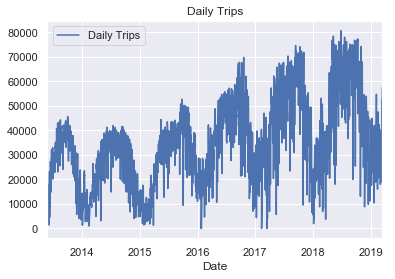

In [44]:
import plotly.plotly as ply
#import cufflinks as cf
data = tripCount_weather[['Date','Daily Trips']]
data = data.set_index('Date')
data.index = pd.to_datetime(data.index)
data.plot(title="Daily Trips")
#data.head()

In [45]:
zero_trip_date = tripCount_weather[tripCount_weather['Daily Trips']==0]
zero_trip_date

,Date,Daily Trips,Miles Today,Subscriber,Customer,TAVG,AWND,SNWD
971,1/23/2016,0,0.0,160005,0,25.5,15.66,5.9
972,1/24/2016,0,0.0,160013,0,27.5,5.82,22.0
973,1/25/2016,0,0.0,160020,0,33.5,3.36,18.9
974,1/26/2016,0,0.0,160028,0,43.0,6.49,16.9
1354,2/9/2017,0,0.0,208018,0,31.5,12.30,2.0
1387,3/14/2017,0,0.0,209843,0,26.5,13.42,3.9
1388,3/15/2017,0,0.0,209859,0,23.0,11.63,5.9
1389,3/16/2017,0,0.0,209870,0,31.5,7.83,5.1


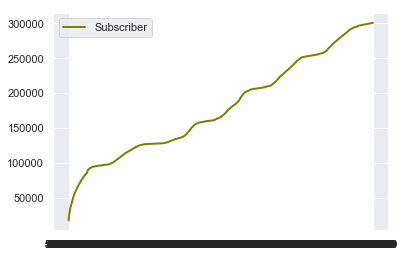

In [46]:
plt.plot( 'Date', 'Subscriber', data=tripCount_weather, marker='', color='olive', linewidth=2)
plt.legend()


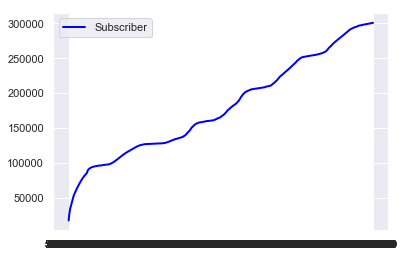

In [47]:
#import plotly.plotly as ply

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
plt.plot( 'Date', 'Subscriber', data=tripCount_weather[['Date', 'Subscriber']], marker='', color='blue', linewidth=2)
plt.legend()

In [48]:
subscribe_diff = tripCount_weather[['Subscriber']].diff()
subscribe_diff['Date'] = tripCount_weather[['Date']]
subscribe_diff = subscribe_diff.dropna()
subscribe_diff.colums = ['New Subscribers','Date']

subscribe_diff.head()

C:\Users\Ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,Subscriber,Date
1,2600.0,5/28/2013
2,2170.0,5/29/2013
3,1999.0,5/30/2013
4,1630.0,5/31/2013
5,1141.0,6/1/2013


In [49]:
subscribe_diff['Subscriber'].mean()

134.00472366556448

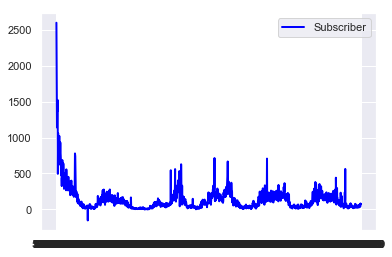

In [50]:
import plotly.plotly as ply
plt.plot( 'Date', 'Subscriber', data=subscribe_diff, marker='', color='blue', linewidth=2)
plt.legend()

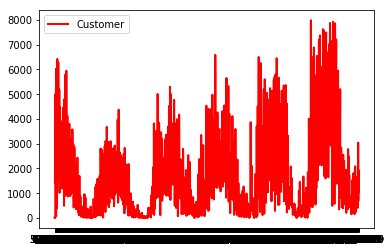

In [39]:
plt.plot( 'Date', 'Customer', data=tripCount_weather, marker='', color='red', linewidth=2)
plt.legend()

In [51]:
Customer_diff = tripCount_weather[['Customer']].diff()
Customer_diff['Date'] = tripCount_weather[['Date']]
Customer_diff = Customer_diff.dropna()
Customer_diff.colums = ['Customer diff','Date']

Customer_diff.head()

C:\Users\Ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,Customer,Date
1,0.0,5/28/2013
2,0.0,5/29/2013
3,0.0,5/30/2013
4,0.0,5/31/2013
5,0.0,6/1/2013


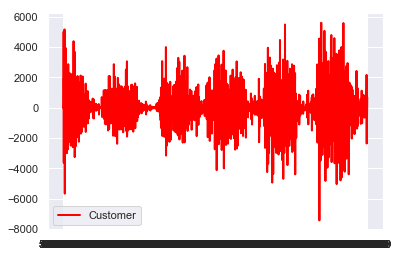

In [52]:

plt.plot( 'Date', 'Customer', data=Customer_diff, marker='', color='red', linewidth=2)
plt.legend()

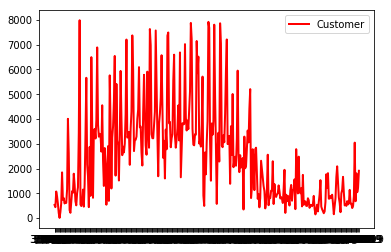

In [16]:
#2018 May - 2019 March - customer daily count
plt.plot( 'Date', 'Customer', data=tripCount_weather[['Date','Customer']][-365:], marker='', color='red', linewidth=2)
plt.legend()

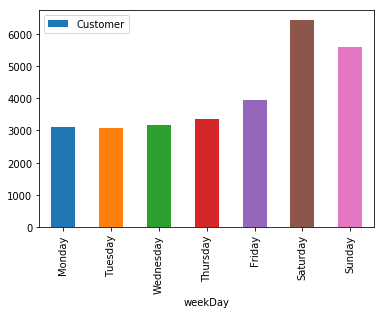

In [44]:
q3_2018 = tripCount_weather[['Date','Customer']][-289:-195] 
new = pd.to_datetime(q3_2018['Date'], format="%m/%d/%Y")
q3_2018['weekDay'] = new.dt.day_name()

week_avg_q3_2018 = q3_2018[['weekDay','Customer']].groupby(['weekDay']).mean()
week_avg_q3_2018 = week_avg_q3_2018.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
week_avg_q3_2018 = week_avg_q3_2018.reset_index('weekDay')

ax = week_avg_q3_2018.plot.bar( x='weekDay', y='Customer')

In [370]:
df_diff1.dropna().corr(method ='pearson')

,Daily Trips,Subscriber,Customer,TAVG,AWND,SNWD
Daily Trips,1.000000,0.070904,0.274816,0.294212,-0.175308,-0.035557
Subscriber,0.070904,1.000000,-0.010200,0.032390,0.007092,-0.007373
Customer,0.274816,-0.010200,1.000000,0.165833,-0.108782,-0.008168
TAVG,0.294212,0.032390,0.165833,1.000000,-0.204592,-0.055148
AWND,-0.175308,0.007092,-0.108782,-0.204592,1.000000,-0.032140
SNWD,-0.035557,-0.007373,-0.008168,-0.055148,-0.032140,1.000000


### Correlation

In [371]:
df[['Daily Trips','Subscriber','Customer','TAVG','AWND','SNWD']].dropna().corr(method ='pearson')

,Daily Trips,Subscriber,Customer,TAVG,AWND,SNWD
Daily Trips,1.000000,0.552753,0.604668,0.648919,-0.473321,-0.363093
Subscriber,0.552753,1.000000,0.288751,0.029924,-0.090457,-0.143518
Customer,0.604668,0.288751,1.000000,0.613607,-0.426478,-0.234839
TAVG,0.648919,0.029924,0.613607,1.000000,-0.550098,-0.379223
AWND,-0.473321,-0.090457,-0.426478,-0.550098,1.000000,0.168550
SNWD,-0.363093,-0.143518,-0.234839,-0.379223,0.168550,1.000000


## Time Series Modeling

<Figure size 432x288 with 0 Axes>

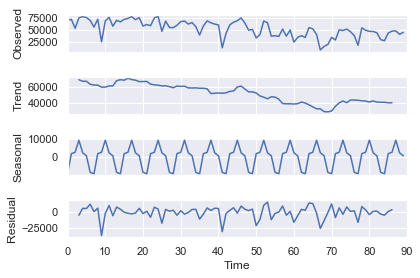

In [63]:
#Check seasonal pattern: 
from statsmodels.tsa.seasonal import seasonal_decompose

def seasonal_pattern_check(df): 
    result = seasonal_decompose(np.asarray(df), model='additive', freq=7)
    fig = plt.figure()  
    fig = result.plot()

seasonal_pattern_check(tripCount_weather['Daily Trips'][-180:-90])


<Figure size 432x288 with 0 Axes>

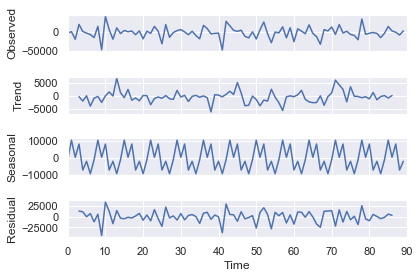

In [85]:
from pandas import Series
# create a differenced series
def diff(df, interval=1):
    diff = list()
    for i in range(interval, len(df)):
        x = df[i] - df[i - interval]
        diff.append(x)
    return Series(diff)


#df_diff1 = diff(tripCount_weather['Daily Trips'])
df_diff1 = tripCount_weather['Daily Trips'].diff()
seasonal_pattern_check(df_diff1[-180:-90])

## Stationary Test on modify data set: Dickey-Fuller statistic

#The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, 
#with the alternative that there is no unit root. If the pvalue is above a critical size, then we cannot reject that there is a unit root.
#Dickey-Fuller test is a test that determines whether you can conclude from a time series that it is stationary. 
#Formally, it tests the null hypothesis H0 that your autoregressive model has a unit root. Therefore, you have to be careful and understand that if you seek stationarity (which is usually the case), you want to reject H0.
#(prob., critical value): (90%, -2.59),(95%, -2.87),(99%, -3.44)
#at the 95% probability level, reject the hypothesis if the test statistics value is less than -2.87 and accept it otherwise.
from statsmodels.tsa.stattools import adfuller

In [72]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(df):
    result = adfuller(df, autolag='AIC')[0]
    if(result >= -2.87): #false to reject H0: a unit root - nonstationary
        return -1
    else: #reject H0: stationary
        return 0
    
    
adfuller_test(tripCount_weather['Daily Trips'][-365:])

-1

In [73]:
adfuller_test(df_diff1[-365:])

0

## Durbin-Watson statistic

#Serial Correlation Test on modify data set: Durbin-Watson statistic
#The value of Durbin-Watson statistic is close to 2 if the errors are uncorrelated.


In [79]:
import statsmodels.api as sm
def durbin_watson_test(df):
    result = sm.stats.durbin_watson(df)
    if ((2- result)/2 < 0.05): #below and close to 2 : noncorrelate
        return 0
    else: #serial correlate : need more modify steps
        return -1
    
    
durbin_watson_test(tripCount_weather['Daily Trips'][-365:])

-1

In [80]:
durbin_watson_test(df_diff1[-365:])

0

## P-value Test: LjungBox test and Boxpierce test 

#At least 95% of number of p values shall be above zero

In [81]:
from statsmodels.stats import diagnostic as diag
def ljungBox_boxPierce_test(df):
    #the 2nd list in the returned array is p-values from the ljungbox test
    ljung = diag.acorr_ljungbox(df, lags=None, boxpierce=True)[1]
    #the 4th list is the p-values from the boxpierce test
    boxpierce = diag.acorr_ljungbox(df, lags=None, boxpierce=True)[3]
    
    if (sum(1 for x in ljung if x > 0)/len(ljung) > 0.95) and (sum(1 for x in boxpierce if x > 0)/len(boxpierce) > 0.95):       
        return 0
    else: 
        return -1 
    
ljungBox_boxPierce_test(tripCount_weather['Daily Trips'][-365:])

-1

In [82]:
ljungBox_boxPierce_test(df_diff1[-365:])

0

## Check lags independent: P/ACF

#Check lags independent: P/ACF
#Soure Code:http://www.blackarbs.com/blog/time-series-analysis-in-python-linear-models-to-garch/11/1/2016
#Check whether the residuals are any significant correlations
#The auto-correlation function computes the correlation between a variable and itself at each lag step up to some limit (in this case 40).
#The partial auto-correlation function computes the correlation at each lag step that is NOT already explained by previous, lower-order lag steps. 
#The auto-correlation and partial-autocorrelation results are very close to each other 
#What this shows is that there is no significant (> 0.2) correlation between the value at time t and at any time prior to t up to 40 steps behind. 
#In order words, the series is a random walk.

C:\Users\Ada\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning:

invalid value encountered in sqrt



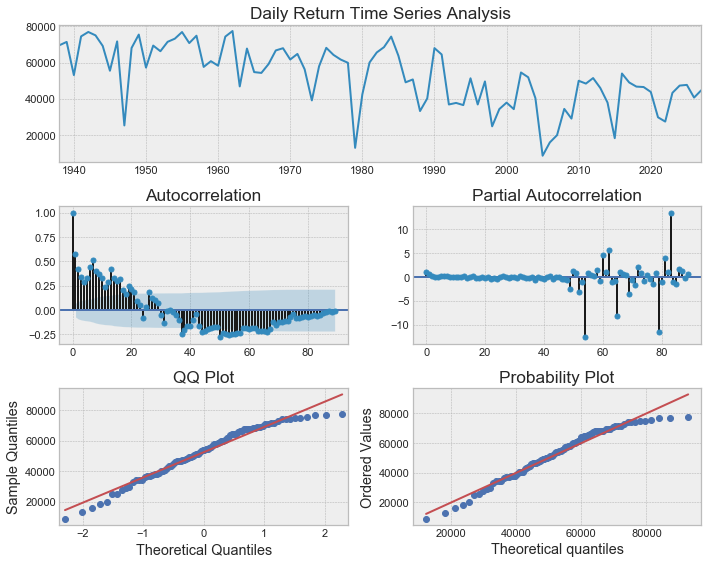

In [83]:
import scipy.stats as scs
import statsmodels.tsa.api as smt
import statsmodels.api as sm
def acf_pacf_plot(df, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(df, pd.Series):
        df = pd.Series(df)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))  
        
        df.plot(ax=ts_ax)
        ts_ax.set_title('Daily Return Time Series Analysis')
        smt.graphics.plot_acf(df, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(df, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(df, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(df, sparams=(df.mean(), df.std()), plot=pp_ax)
        plt.tight_layout()     
    return

acf_pacf_plot(tripCount_weather['Daily Trips'][-180:-90])

C:\Users\Ada\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning:

invalid value encountered in sqrt



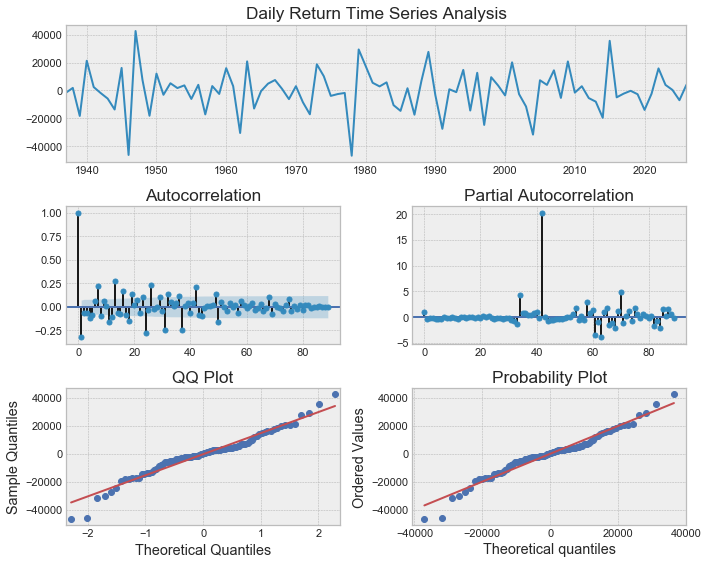

In [84]:
acf_pacf_plot(df_diff1[-180:-90])

In [ ]:
#The Rate of Change (ROC) is a technical indicator that measures the percentage change between 
#the most recent price and the price “n” day’s ago. The indicator fluctuates around the zero line.
#ROC = [(df['Daily Trips']-df['Daily Trips'].shift(-7)) / df['Daily Trips'].shift(-7)]
#exmpale use 7 days period Rate of change 
def ROC(df,n):
     N = df['Close'].diff(n)
     D = df['Close'].shift(n)
     ROC = pd.Series(N/D,name='Rate of Change')
     df = df.join(ROC)
     return df
ROC(df,n)

In [86]:
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential    #deep learning library
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
import keras
#import pandas_datareader.data as web
import h5py
import warnings 
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy


## Seasonal Autoregression Moving Average - SARIMA 

In [98]:
#Find the best model of SARIMA by min AIC        
import warnings 
import itertools
def best_SARIMAX(df, num_param):
    # Define the p, d and q parameters to take any value between 0 and num_param-1
    p = d = q = range(0, num_param)
    P = D = Q = range(0, num_param)
    ####### Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))
    PDQ = list(itertools.product(P, D, Q))
    #del pdq[0] #remove (0,0,0)
    #del PDQ[0]
    
    #use AIC to eveluate model performence
    best_aic=100000000000
    
    best_pdq = pdq[1]
    best_PDQ = PDQ[1]
    warnings.filterwarnings("ignore") # specify to ignore warning messages
    for i in pdq:
        for j in PDQ:
            try:
                mod = sm.tsa.statespace.SARIMAX(df, trend='n', order=i, seasonal_order=(j[0],j[1],j[2],term)).fit()
                p=mod.pvalues
                
                if all(prob < 0.05 for prob in p): 
                    if (mod.aic < best_aic):
                        best_aic = mod.aic
                        best_pdq = i
                        best_PDQ = j 
            except:
                 continue
                
    return best_pdq,best_PDQ

In [129]:
#Fitting to the Model - SARIMA 
import statsmodels.api as sm
from datetime import datetime, timedelta

def sarima_ml(df, term,pred_days):
    df.columns=['Daily_Trips']
    pdq, PDQ =best_SARIMAX(df, term)
    sarimax_model = sm.tsa.statespace.SARIMAX(df, trend='n', order=pdq, seasonal_order=(PDQ[0],PDQ[1],PDQ[2],term)).fit()
    print(sarimax_model.summary())
        
    #yesterday = (datetime.now() - timedelta(days=190)).date().strftime('%Y%m%d')
    #pred_date= (datetime.now() + timedelta(days=-1)).date().strftime('%Y%m%d')

    sarimax_model.plot_diagnostics(figsize=(10, 8))
    plt.show()
        
    sarima_forecast = sarimax_model.get_prediction(start = '20181001', end = '20181231', dynamic = False, full_results = True)
    sarima_forecast_means = pd.DataFrame(sarima_forecast.predicted_mean)
    sarima_forecast_means.columns=['Forecase']
    df_for=sarima_forecast_means.join(df)
    df_for.plot()
    plt.show()
    
    price_for = sarima_forecast_means
    #print("SARIMAX: " + 'CitiBike trips' + " on next " + str(pred_days)+" day prediction count is " + str(sarima_forecast_means.iloc[-1]))          
    price_for.to_csv('citibike_sarima_for.csv', sep=',')
  


In [117]:
tripCount_weather['diff'] = tripCount_weather['Daily Trips'].diff()

tripCount_weather.head()

,Date,Daily Trips,Miles Today,Subscriber,Customer,TAVG,AWND,SNWD,diff
0,5/27/2013,9767,21.533,17216,0,62.0,3.80,0.0,NaN
1,5/28/2013,5215,8.780,19816,0,62.0,2.68,0.0,-4552.0
2,5/29/2013,10981,21.898,21986,0,70.0,1.57,0.0,5766.0
3,5/30/2013,9850,20.321,23985,0,81.0,5.14,0.0,-1131.0
4,5/31/2013,9253,20.243,25615,0,82.5,4.03,0.0,-597.0


In [119]:
trip_diffIndex = tripCount_weather
trip_diffIndex.index = trip_diffIndex['Date']
trip_diffIndex[['diff']].head()

,diff
Date,
5/27/2013,NaN
5/28/2013,-4552.0
5/29/2013,5766.0
5/30/2013,-1131.0
5/31/2013,-597.0


In [120]:
diff_count = trip_diffIndex[['diff']][:-90].dropna()

In [121]:
best_SARIMAX(diff_count[:-90],3)

((0, 0, 1), (0, 0, 1))

In [151]:
diff_count[720:]

,diff
Date,
5/18/2015,-479.0
5/19/2015,2745.0
5/20/2015,-252.0
5/21/2015,-2944.0
5/22/2015,822.0
5/23/2015,-7913.0
5/24/2015,1415.0
5/25/2015,3236.0
5/26/2015,7646.0


                                 Statespace Model Results                                
Dep. Variable:                       Daily_Trips   No. Observations:                 1307
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 3)   Log Likelihood              -13974.956
Date:                           Sun, 19 May 2019   AIC                          27955.912
Time:                                   21:28:31   BIC                          27971.438
Sample:                               05-18-2015   HQIC                         27961.736
                                    - 12-14-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7124      0.022    -32.151      0.000      -0.756      -0.669
ma.S.L3       -0.1799      0.030     -5.905

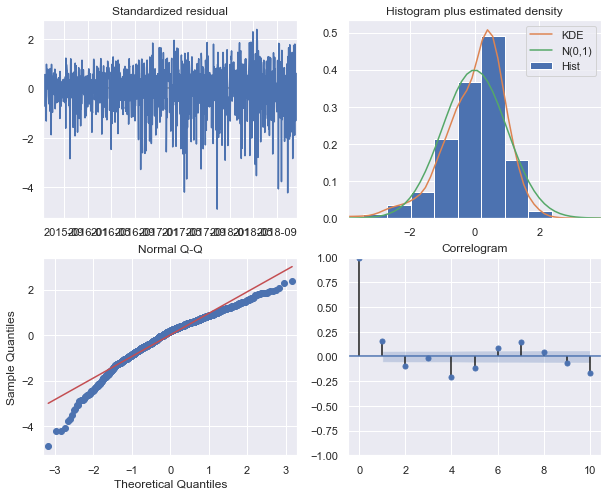

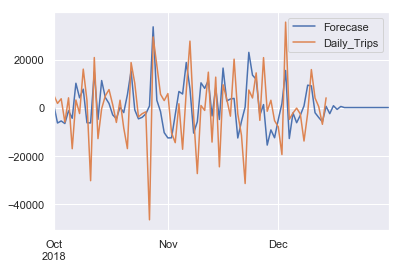

In [130]:
sarima_ml(diff_count[720:],3,90)

In [148]:
sarima_result = pd.read_csv('citibike_sarima_for.csv')
sarima_result = sarima_result[:-17]

sarima_result.head()

,Unnamed: 0,Forecase
0,2018-10-01,1011.084064
1,2018-10-02,-6433.837402
2,2018-10-03,-5582.635510
3,2018-10-04,-6652.702645
4,2018-10-05,-1350.062079


In [149]:
x = diff_count[-75:]
x = x.reset_index()
sarima_result['diff'] = x['diff']
sarima_result.head()

,Unnamed: 0,Forecase,diff
0,2018-10-01,1011.084064,5163.0
1,2018-10-02,-6433.837402,1726.0
2,2018-10-03,-5582.635510,3656.0
3,2018-10-04,-6652.702645,-6071.0
4,2018-10-05,-1350.062079,4046.0


In [150]:
from sklearn.metrics import r2_score
r2_score(sarima_result['diff'], sarima_result['Forecase']) 

0.20152112498958863

In [152]:
from sklearn.metrics import mean_squared_error
mean_squared_error(sarima_result['diff'], sarima_result['Forecase']) 

156670405.86161822

## LSTM - Deep Learning with Keras

In [154]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [155]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [169]:
data = tripCount_weather['diff'].reset_index().dropna()
data.to_csv('data_lstm.csv',sep=',')

In [172]:
#update Date formate to 'YYYY-MM' in Excel
data = pd.read_csv('data_lstm.csv', usecols=[1], engine='python')
data = data.values 
data = data.astype('float32')

In [173]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [175]:
# split into train and test sets
train_size = int(len(data) * 0.70)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]
print(len(train), len(test))

1481 636


In [177]:
# convert an array of values into a dataset matrix
def create_dataset(data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(data[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


In [178]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [179]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [180]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 5s - loss: 0.0285
Epoch 2/100
 - 3s - loss: 0.0098
Epoch 3/100
 - 4s - loss: 0.0089
Epoch 4/100
 - 3s - loss: 0.0085
Epoch 5/100
 - 3s - loss: 0.0082
Epoch 6/100
 - 3s - loss: 0.0081
Epoch 7/100
 - 3s - loss: 0.0081
Epoch 8/100
 - 3s - loss: 0.0081
Epoch 9/100
 - 3s - loss: 0.0080
Epoch 10/100
 - 3s - loss: 0.0081
Epoch 11/100
 - 3s - loss: 0.0081
Epoch 12/100
 - 3s - loss: 0.0080
Epoch 13/100
 - 3s - loss: 0.0080
Epoch 14/100
 - 3s - loss: 0.0080
Epoch 15/100
 - 3s - loss: 0.0080
Epoch 16/100
 - 3s - loss: 0.0080
Epoch 17/100
 - 3s - loss: 0.0079
Epoch 18/100
 - 3s - loss: 0.0079
Epoch 19/100
 - 3s - loss: 0.0079
Epoch 20/100
 - 3s - loss: 0.0079
Epoch 21/100
 - 3s - loss: 0.0080
Epoch 22/100
 - 3s - loss: 0.0079
Epoch 23/100
 - 3s - loss: 0.0079
Epoch 24/100
 - 3s - loss: 0.0079
Epoch 25/100
 - 4s - loss: 0.0079
Epoch 26/100
 - 3s - loss: 0.0079
Epoch

In [182]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 8186.93 RMSE
Test Score: 12477.18 RMSE


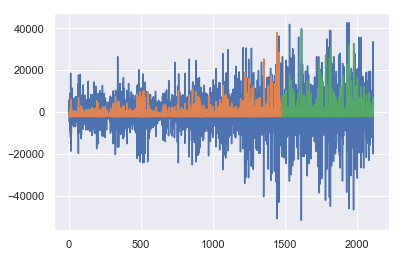

In [184]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(data)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()